In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sounddevice as sd
from scipy.io import wavfile
from scipy import signal
from pydub import AudioSegment
import librosa
from spafe.features.gfcc import gfcc

In [3]:
soundfile1 = 'Alesis-S4-Plus-Dyna-Roadz-C3.wav'
soundfile2 = 'Alesis-Sanctuary-QCard-Tines-Aahs-C4.wav'

sr1, data1 = wavfile.read(soundfile1)
sr2, data2 = wavfile.read(soundfile2)
print(np.shape(data1),np.shape(data2))

(268960, 2) (143359, 2)


C:\Users\Oleg\AppData\Local\Temp\ipykernel_8260\754077753.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr1, data1 = wavfile.read(soundfile1)
C:\Users\Oleg\AppData\Local\Temp\ipykernel_8260\754077753.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr2, data2 = wavfile.read(soundfile2)


In [4]:
data1 = data1[:,0]
data2 = data2[:,0]

In [5]:
sd.play(data1, sr1)
sd.wait()
sd.play(data2, sr2)
sd.wait()

In [6]:
duration1 = len(data1)/sr1
time1 = np.arange(0,duration1,1/sr1) #time vector

duration2 = len(data2)/sr2
time2 = np.arange(0,duration2,1/sr2)

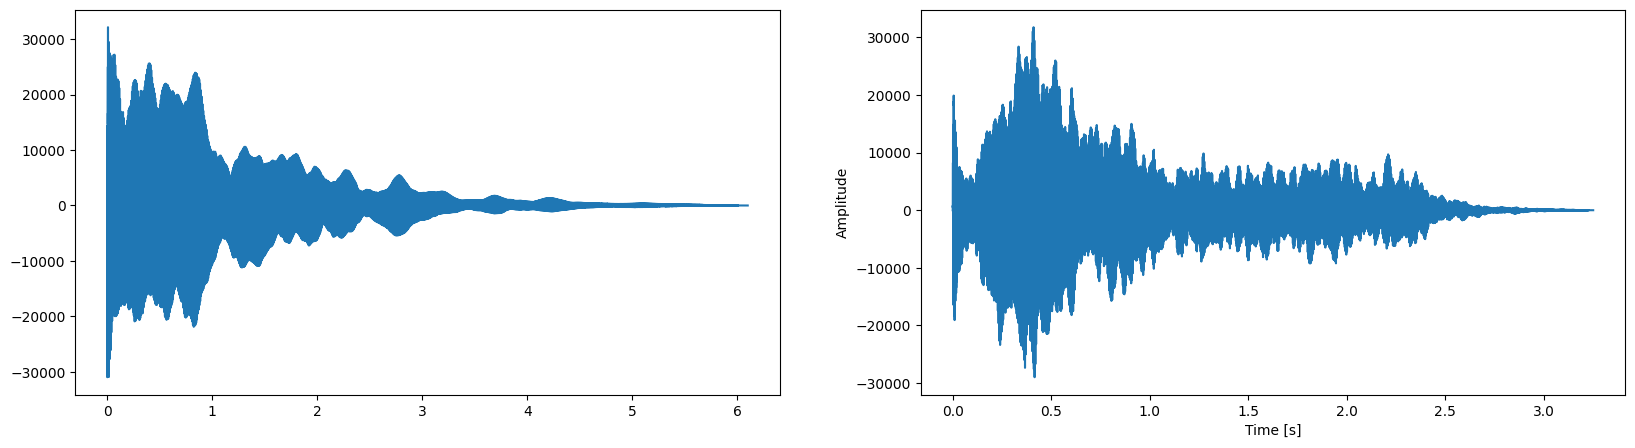

In [7]:
fig, axs = plt.subplots(1,2,figsize=(20, 5))
axs[0].plot(time1, data1)
axs[1].plot(time2, data2)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

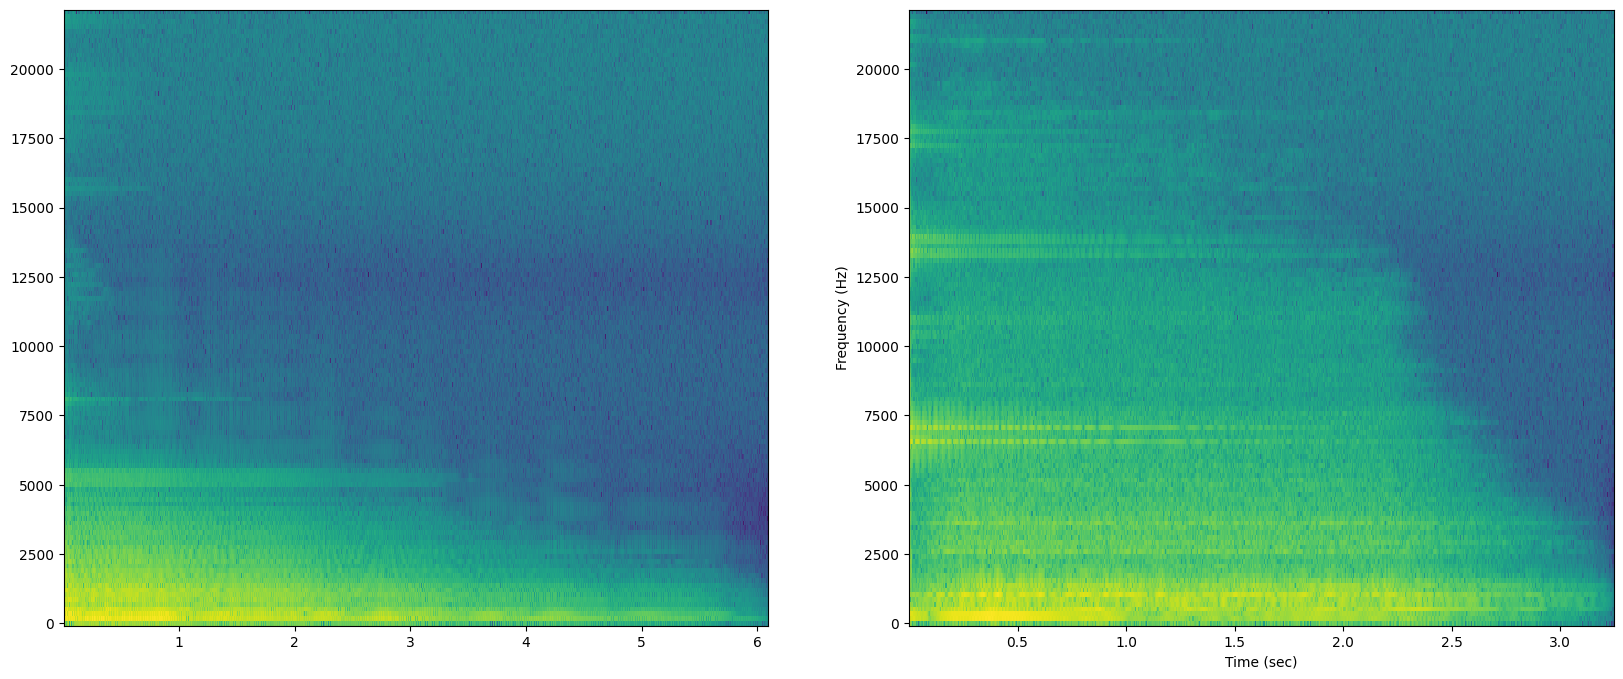

In [8]:
fig, axs = plt.subplots(1,2,figsize=(20, 8))
fr1, tm1, spgram1 = signal.spectrogram(data1,sr1)
fr2, tm2, spgram2 = signal.spectrogram(data2,sr2)

lspg1 = np.log(spgram1)
lspg2 = np.log(spgram2)
axs[0].pcolormesh(tm1,fr1,lspg1,shading='auto')
axs[1].pcolormesh(tm2,fr2,lspg2,shading='auto')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (sec)')
plt.show()

In [9]:
samples1, sample_rate1 = librosa.load(soundfile1)

y1 = samples1
sr1 = sample_rate1
mfccs1 = librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=10)

samples2, sample_rate2 = librosa.load(soundfile2    )

y2 = samples2
sr2 = sample_rate2
mfccs2 = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=10)

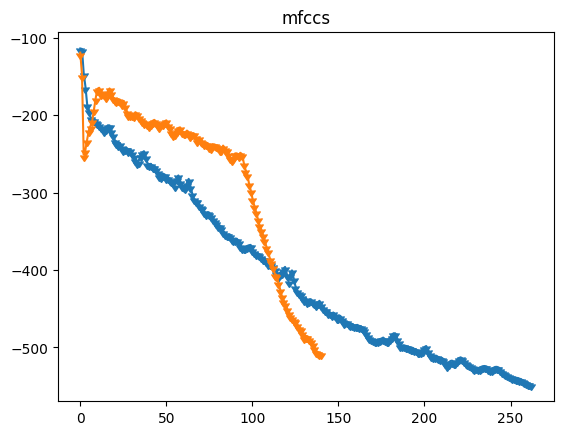

In [12]:
s1 = mfccs1[0:1,:][0,:]
t1 = [*range(len(s1))]
s2 = mfccs2[0:1,:][0,:]
t2 = [*range(len(s2))]
plt.plot(t1,  s1.reshape(263,1),marker=matplotlib.markers.CARETDOWNBASE)
plt.plot(t2,  s2.reshape(141,1),marker=matplotlib.markers.CARETDOWNBASE)
plt.title('mfccs')
plt.show()

In [14]:
samples1, sample_rate1 = librosa.load(soundfile1)

y1 = samples1
sr1 = sample_rate1
gfccs1 = gfcc(y1, fs=sr1, num_ceps=1)

samples2, sample_rate2 = librosa.load(soundfile2)

y2 = samples2
sr2 = sample_rate2
gfccs2 = gfcc(y2, fs=sr2, num_ceps=1)

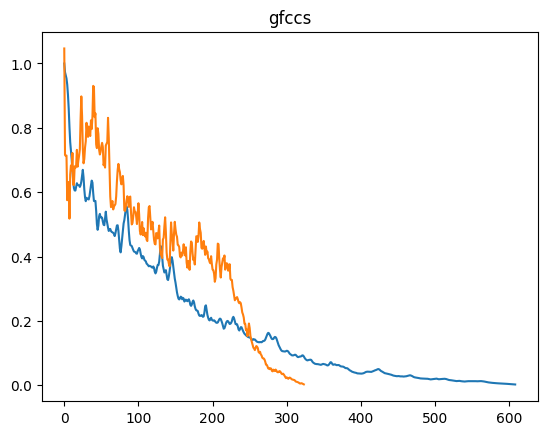

In [15]:
plt.plot(gfccs1)
plt.plot(gfccs2)
plt.title('gfccs')
plt.show()